# 06 - Projeções

Para essa atividade vamos usar o Numpy e Matplotlib. Assim vamos carregar as bibliotecas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

Vamos definir algumas funções auxiliares que vão nos ajudar a interpretar os resultados nos gráficos.

In [3]:
# Faz o setup para desenhar gráficos em 2D
def graph(w, h):
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    ax.set_xlim(-1, w)
    ax.set_ylim(-1, h)
    ax.axhline(0, color='black') # deixa o X do eixo 0 em destaque
    ax.axvline(0, color='black') # deixa o Y do eixo 0 em destaque
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y')
    ax.invert_yaxis()

    return ax

# Faz o setup para desenhar gráficos em 3D
def graph3d(c = 1.0):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_xlim3d(-4, 4)  # faixa de visualização de X
    ax.set_ylim3d(-3, 3)  # faixa de visualização de Y
    ax.set_zlim3d(-4, 4)  # faixa de visualização de Z
    #ax.set_aspect('equal') # Não suportado em todas as plataformas
    ax.quiver([-c/2,0,0],[0,-c/2,0],[0,0,-c/2],
              [c,0,0],[0,c,0],[0,0,c],
              arrow_length_ratio=0.2, color="grey")
    fig.tight_layout()
    ax.view_init(elev=20.0, azim=30.0,  vertical_axis='y')
    return ax

# Desenha um plano no espaço
def draw_plane(ax, w, h, d):
    pontos = np.array([[-w/2.0, w/2.0, w/2.0, -w/2.0],
                       [-h/2.0, -h/2.0, h/2.0, h/2.0],
                       [d, d, d, d]])
    tri = Poly3DCollection([pontos.transpose()], alpha=.25)
    tri.set_color('blue')
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)

# Desenha um cubo no espaço
def draw_cube(ax):
    #stackoverflow.com/questions/42611342/
    pos=(0,0,0)
    size=(2,2,2)
    o = [a - b / 2 for a, b in zip(pos, size)]
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    X, Y, Z = np.array(x), np.array(y), np.array(z)
    ax.plot_surface(X, Y, Z, color='b', rstride=1, cstride=1, alpha=0.1)


## Transformações Projetivas

Vamos começar com a forma mais simples de projeção. Traga os pontos para um plano de projeção em uma distância d=-2 da câmera. Os pontos no espaço devem aparece exatamente em cima do plano.

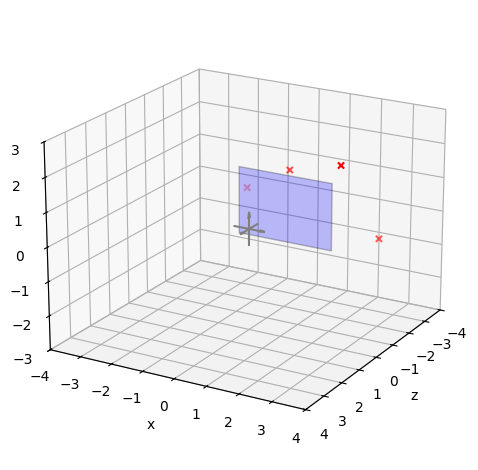

In [4]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

# distância do plano de projeção
d = -2

# plano de projeção de tamanho 3x2
draw_plane(ax, 3, 2, d)

# Pontos
pontos = np.array([[-1.8, 2.0, -0.5, 1.0],
                   [0.0, -1.2, 0.7, 1.0],
                   [-3.0, -4.0, -3.2, -3.5]])
ax.scatter(pontos[0], pontos[1], pontos[2], color='red', s=20, marker = "x")

# FAÇA AQUI SUA IMPLEMENTAÇÃO
# Ajustar os pontos para coordenadas homogêneas
# Calcular a matriz de projeção
# Multiplicar a matriz de projeção pelos pontos
# Divisão Homogênea (Homogeneous Divide)

# Plota os novos pontos no gráfico
#ax.scatter(pontos_proj[0], pontos_proj[1], pontos_proj[2], color='green', s=20, marker = "x")

plt.show()

Suponha que os vértices a seguir já estão posicionados na coordenada da câmera. Faça a Transformação desses pontos para o espaço NDC(Normalized Device Coords). Nesse caso os pontos devem aparecer dentro do cubo.

In [ ]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D
draw_cube(ax) # desenha o cubo do NDC

# field of view na vertical (em Y)
fovy = 45

# Resolução da imagem final
W = 300
H = 200

# Planos near e far
near = 0.5
far = 10

# Pontos
pontos = np.array([[1.0, 1.0, 2.0, 2.0],
                   [1.0, 1.0, 1.0, 1.0],
                   [-2.0, -3.0, -2.0, -3.0]])
ax.scatter(pontos[0], pontos[1], pontos[2], color='red', s=20, marker = "x")

# FAÇA AQUI SUA IMPLEMENTAÇÃO
# Encontrando razão de aspecto da visualização
# Encontrando quantidades derivadas (Right e Top)
# Ajustar os pontos para coordenadas homogêneas
# Calcular a matriz de projeção
# Multiplicar a matriz de perspectiva pelos pontos
# Divisão Homogênea (Homogeneous Divide)

# Plota os novos pontos no gráfico
# ax.scatter(pontos_proj[0], pontos_proj[1], pontos_proj[2], color='green', s=20, marker = "x")

plt.show()

Faça agora a transformação dos pontos acima para coordenadas de tela. Projete só as coordenadas 2D diretamente no gráfico abaixo. Os 4 pontos devem aparecer na tela.

In [ ]:
ax = graph(W, H) # configura o espaço para desenhar um gráfico 2D

# Calcular a matriz de transformação de tela (Screen)
# Multiplicar a matriz de perspectiva pelos pontos
# Divisão Homogênea (Homogeneous Divide)

# Plota os pontos finais no gráfico 2D
#plt.scatter(pontos2d[0], pontos2d[1], s=20, color="blue")
